<a href="https://colab.research.google.com/github/riya-07/stock_market_price_prediction/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting Google Drive
Mount the google drive to access the dataset 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Read Dataset

In [ ]:
print("Path details:")
print("Nifty50: /content/gdrive/MyDrive/Data_Science_project/NIFTY 50.csv")
print("Nifty100: /content/gdrive/MyDrive/Data_Science_project/NIFTY 100.csv")
print("Nifty Bank: /content/gdrive/MyDrive/Data_Science_project/NIFTY BANK.csv")
print("Nifty FMCG: /content/gdrive/MyDrive/Data_Science_project/NIFTY FMCG.csv")
print("Nifty Metal: /content/gdrive/MyDrive/Data_Science_project/NIFTY METAL.csv")
print("Nifty IT: /content/gdrive/MyDrive/Data_Science_project/NIFTY IT.csv")
print("Nifty Pharma: /content/gdrive/MyDrive/Data_Science_project/NIFTY PHARMA.csv")
path=input("Enter path of file: ")

Path details:
Nifty50: /content/gdrive/MyDrive/Data_Science_project/NIFTY 50.csv
Nifty100: /content/gdrive/MyDrive/Data_Science_project/NIFTY 100.csv
Nifty Bank: /content/gdrive/MyDrive/Data_Science_project/NIFTY BANK.csv
Nifty FMCG: /content/gdrive/MyDrive/Data_Science_project/NIFTY FMCG.csv
Nifty Metal: /content/gdrive/MyDrive/Data_Science_project/NIFTY METAL.csv
Nifty IT: /content/gdrive/MyDrive/Data_Science_project/NIFTY IT.csv
Nifty Pharma: /content/gdrive/MyDrive/Data_Science_project/NIFTY PHARMA.csv
Enter path of file: /content/drive/MyDrive/Data_Science_project/NIFTY 500.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nifty=pd.read_csv(path,parse_dates=["Date"])

In [ ]:
nifty5=nifty[nifty['Date'] > '2019-01-01']

In [ ]:
nifty5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 4730 to 5352
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       623 non-null    datetime64[ns]
 1   Open       623 non-null    float64       
 2   High       623 non-null    float64       
 3   Low        623 non-null    float64       
 4   Close      623 non-null    float64       
 5   Volume     621 non-null    float64       
 6   Turnover   621 non-null    float64       
 7   P/E        623 non-null    float64       
 8   P/B        623 non-null    float64       
 9   Div Yield  623 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 53.5 KB


In [ ]:
dfn=nifty5.reset_index()['Close']

# Cleaning the data


In [ ]:
dfn

0       9103.40
1       9014.80
2       9054.90
3       9081.15
4       9098.65
         ...   
618    13454.10
619    13494.45
620    13585.75
621    13574.15
622    13631.00
Name: Close, Length: 623, dtype: float64

In [ ]:
to_drop=['Turnover','P/E','P/B','Div Yield']
nifty5.drop(to_drop,inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
nifty5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 4730 to 5352
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    623 non-null    datetime64[ns]
 1   Open    623 non-null    float64       
 2   High    623 non-null    float64       
 3   Low     623 non-null    float64       
 4   Close   623 non-null    float64       
 5   Volume  621 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 34.1 KB


In [ ]:
nifty5.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    2
dtype: int64

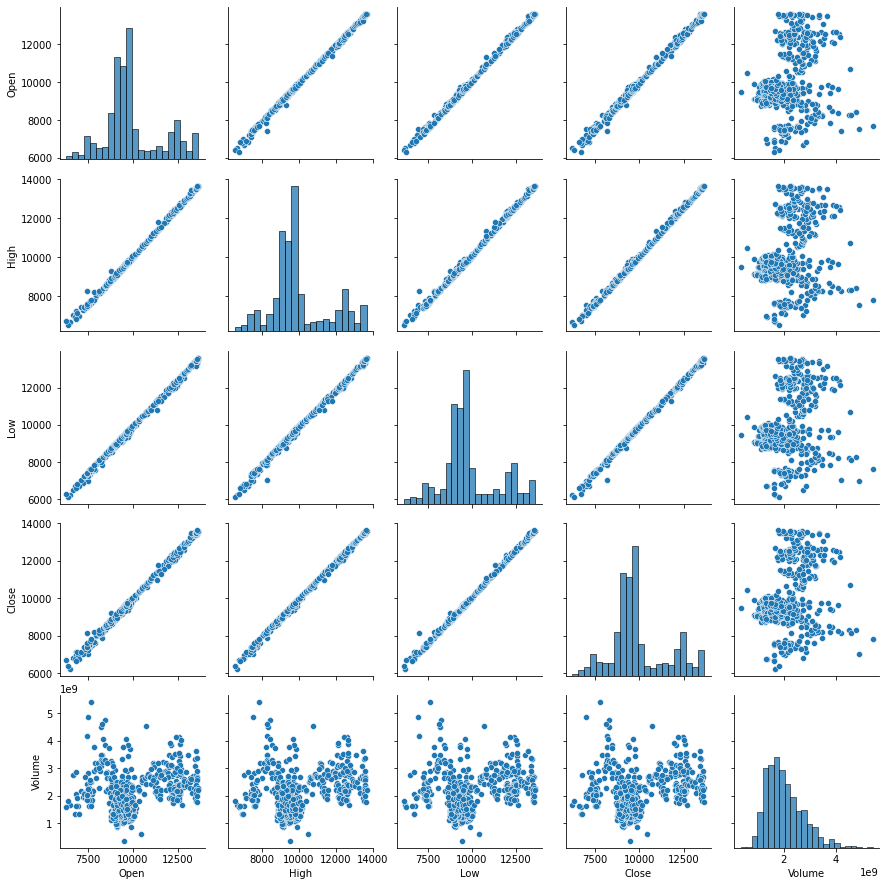

In [ ]:
import seaborn as sb
sb.pairplot(data=nifty5)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X1, Y1 = load_digits(return_X_y=True)
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X1,Y1)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(nifty5.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(3,'Score'))  #print 5 best features

   Specs        Score
42   NaN  6416.086725
33   NaN  5688.250795
43   NaN  5448.251542


In [ ]:
def createFeatures(df):
    df = pd.DataFrame(df)
    # Moving averages - different periods
    df['MA200'] = df['Close'].rolling(window=200).mean() 
    df['MA100'] = df['Close'].rolling(window=100).mean() 
    df['MA50'] = df['Close'].rolling(window=50).mean() 
    df['MA26'] = df['Close'].rolling(window=26).mean() 
    df['MA20'] = df['Close'].rolling(window=20).mean() 
    df['MA12'] = df['Close'].rolling(window=12).mean() 
    
    # SMA Differences - different periods
    df['DIFF-MA200-MA50'] = df['MA200'] - df['MA50']
    df['DIFF-MA200-MA100'] = df['MA200'] - df['MA100']
    df['DIFF-MA200-CLOSE'] = df['MA200'] - df['Close']
    df['DIFF-MA100-CLOSE'] = df['MA100'] - df['Close']
    df['DIFF-MA50-CLOSE'] = df['MA50'] - df['Close']
    
    # Moving Averages on high, lows, and std - different periods
    df['MA200_low'] = df['Low'].rolling(window=200).min()
    df['MA14_low'] = df['Low'].rolling(window=14).min()
    df['MA200_high'] = df['High'].rolling(window=200).max()
    df['MA14_high'] = df['High'].rolling(window=14).max()
    df['MA20dSTD'] = df['Close'].rolling(window=20).std() 
    
    # Exponential Moving Averages (EMAS) - different periods
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['EMA100'] = df['Close'].ewm(span=100, adjust=False).mean()
    df['EMA200'] = df['Close'].ewm(span=200, adjust=False).mean()
    # Shifts (one day before and two days before)
    df['close_shift-1'] = df.shift(-1)['Close']
    df['close_shift-2'] = df.shift(-2)['Close']
    # Bollinger Bands
    df['Bollinger_Upper'] = df['MA20'] + (df['MA20dSTD'] * 2)
    df['Bollinger_Lower'] = df['MA20'] - (df['MA20dSTD'] * 2)
    
    # Relative Strength Index (StochRSI)
    df['K-ratio'] = 100*((df['Close'] - df['MA14_low']) / (df['MA14_high'] - df['MA14_low']) )
    df['StochRSI'] = df['K-ratio'].rolling(window=3).mean() 
    # Moving Average Convergence/Divergence (MACD)
    df['MACD'] = df['EMA12'] - df['EMA26']
    
    # Replace nas 
    nareplace = df.at[df.index.max(), 'Close']    
    df.fillna((nareplace), inplace=True)
    
    return df


         Close       Date  Bollinger_Upper  Bollinger_Lower       MA100        EMA100  Prediction
5348  13454.10 2021-07-01     13602.774246     13362.490754  12705.9060  12640.857620    13454.10
5349  13494.45 2021-07-02     13600.351818     13374.968182  12717.9920  12657.760440    13494.45
5350  13585.75 2021-07-05     13613.766704     13372.163296  12731.0510  12676.136471    13585.75
5351  13574.15 2021-07-06     13622.997839     13370.692161  12742.3795  12693.918917    13574.15
5352  13631.00 2021-07-07     13638.959506     13378.190494  12754.3475  12712.474978    13631.00


<function matplotlib.pyplot.show(*args, **kw)>

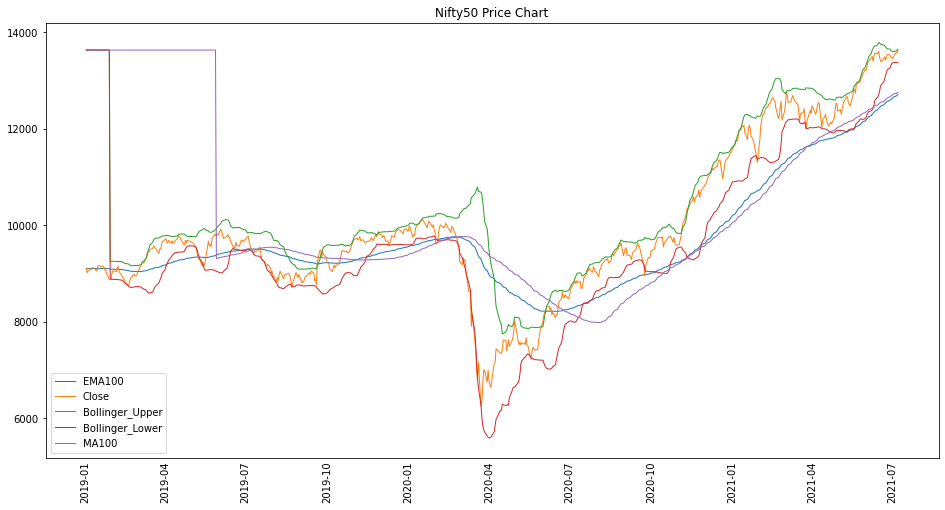

In [ ]:
# List of considered Features
FEATURES = ['Close','Date','Bollinger_Upper','Bollinger_Lower','MA100','EMA100']

# Create the dataset with features
data = createFeatures(nifty5)

# Shift the timeframe by 10 month
use_start_date = pd.to_datetime("2010-11-01" )
data = data[data['Date'] > use_start_date].copy()

# Filter the data to the list of FEATURES
data_filtered = data[FEATURES]

# We add a prediction column and set dummy values to prepare the data for scaling
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['Close'] 
print(data_filtered_ext.tail().to_string())


# remove Date column before training
dfs = data_filtered_ext.copy()
del dfs[('Date')]
del dfs[('Prediction')]

# Register matplotlib converters

# Define plot parameters 
nrows = dfs.shape[1]
fig, ax = plt.subplots(figsize=(16, 8))
x = data_filtered_ext['Date']
assetname_list = []

# Plot each column
for i in range(nrows):
    assetname = dfs.columns[i-1]
    y = data_filtered_ext[assetname]
    ax.plot(x, y, label=assetname, linewidth=1.0)
    assetname_list.append(assetname)

# Configure and show the plot    
ax.set_title('Nifty50 Price Chart')
ax.legend()
ax.tick_params(axis="x", rotation=90, labelsize=10, length=0)   
plt.show

Plotting the close price of last 5 Years 

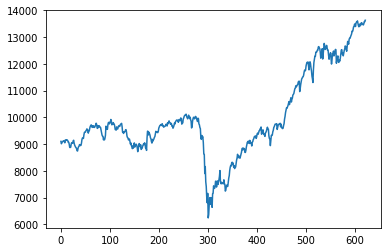

In [ ]:
import matplotlib.pyplot as plt
plt.plot(dfn)

# Scaling the data
We scale the data in the range [0,1] for calculative purposes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dfn=scaler.fit_transform(np.array(dfn).reshape(-1,1))

In [ ]:
print(dfn)

[[0.38716838]
 [0.37517596]
 [0.38060368]
 [0.38415674]
 [0.38652545]
 [0.39042366]
 [0.38933406]
 [0.38646454]
 [0.38013671]
 [0.39444369]
 [0.39466026]
 [0.39504602]
 [0.3921359 ]
 [0.39419329]
 [0.39092447]
 [0.38249188]
 [0.38294532]
 [0.37240796]
 [0.35646995]
 [0.35634136]
 [0.35759339]
 [0.37369383]
 [0.38079318]
 [0.37885761]
 [0.37772063]
 [0.38923931]
 [0.39290742]
 [0.3781673 ]
 [0.36872631]
 [0.36306172]
 [0.35799946]
 [0.35548186]
 [0.34976313]
 [0.33992285]
 [0.33829182]
 [0.35227396]
 [0.35986735]
 [0.3623105 ]
 [0.37098674]
 [0.36683135]
 [0.36589063]
 [0.36721034]
 [0.37824851]
 [0.39667028]
 [0.40436519]
 [0.40367488]
 [0.40173931]
 [0.41995127]
 [0.4328438 ]
 [0.43411613]
 [0.4337033 ]
 [0.44076881]
 [0.44311045]
 [0.45034515]
 [0.44802382]
 [0.44085679]
 [0.42889145]
 [0.4425555 ]
 [0.44109367]
 [0.45464943]
 [0.46300758]
 [0.46819166]
 [0.47073633]
 [0.4622902 ]
 [0.45799269]
 [0.46588387]
 [0.45904169]
 [0.46490931]
 [0.45749188]
 [0.45906199]
 [0.46448295]
 [0.47

In [ ]:
##splitting dataset into train and test split
training_size=int(len(dfn)*0.70)
test_size=len(dfn)-training_size
train_data,test_data=dfn[0:training_size,:],dfn[training_size:len(dfn),:1]

In [ ]:
training_size,test_size

(436, 187)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(415, 20)
(415,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(166, 20)
(166,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creation of LSTM Model
It is special kind of recurrent neural network that is capable of learning long term dependencies in data. This is achieved because the recurring module of the model has a combination of four layers interacting with each other.

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(30,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(30,return_sequences=True))
model.add(LSTM(30))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 20, 30)            7320      
                                                                 
 lstm_2 (LSTM)               (None, 30)                7320      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 18,511
Trainable params: 18,511
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 20, 30)            7320      
                                                                 
 lstm_2 (LSTM)               (None, 30)                7320      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 18,511
Trainable params: 18,511
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fitting the data to use previous 100 data to predict future values
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
7/7 [==============================] - 6s 222ms/step - loss: 0.0958 - val_loss: 0.1212
Epoch 2/10
7/7 [==============================] - 0s 32ms/step - loss: 0.0137 - val_loss: 0.0077
Epoch 3/10
7/7 [==============================] - 0s 34ms/step - loss: 0.0067 - val_loss: 0.1039
Epoch 4/10
7/7 [==============================] - 0s 31ms/step - loss: 0.0092 - val_loss: 0.0735
Epoch 5/10
7/7 [==============================] - 0s 31ms/step - loss: 0.0050 - val_loss: 0.0284
Epoch 6/10
7/7 [==============================] - 0s 32ms/step - loss: 0.0053 - val_loss: 0.0539
Epoch 7/10
7/7 [==============================] - 0s 32ms/step - loss: 0.0047 - val_loss: 0.0578
Epoch 8/10
7/7 [==============================] - 0s 31ms/step - loss: 0.0042 - val_loss: 0.0345
Epoch 9/10
7/7 [==============================] - 0s 31ms/step - loss: 0.0042 - val_loss: 0.0386
Epoch 10/10
7/7 [==============================] - 0s 30ms/step - loss: 0.0039 - val_loss: 0.0391


In [ ]:
tf.__version__

'2.8.2'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.06205084619449043

In [ ]:
mape = np.mean(np.abs((ytest-test_predict)/ytest))
print('MAPE: '+str(mape))

MAPE: 0.24556808587117226


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
test_predict

array([[ 9460.198 ],
       [ 9458.675 ],
       [ 9457.764 ],
       [ 9458.957 ],
       [ 9464.121 ],
       [ 9473.96  ],
       [ 9488.177 ],
       [ 9510.418 ],
       [ 9534.793 ],
       [ 9560.833 ],
       [ 9589.37  ],
       [ 9620.1045],
       [ 9652.439 ],
       [ 9685.001 ],
       [ 9720.418 ],
       [ 9754.565 ],
       [ 9790.184 ],
       [ 9825.518 ],
       [ 9859.95  ],
       [ 9893.441 ],
       [ 9924.743 ],
       [ 9954.678 ],
       [ 9981.973 ],
       [10008.535 ],
       [10033.8   ],
       [10059.048 ],
       [10084.06  ],
       [10110.272 ],
       [10136.411 ],
       [10162.046 ],
       [10186.855 ],
       [10211.224 ],
       [10237.858 ],
       [10261.038 ],
       [10280.541 ],
       [10296.6455],
       [10314.42  ],
       [10330.313 ],
       [10345.943 ],
       [10360.617 ],
       [10376.065 ],
       [10392.197 ],
       [10408.651 ],
       [10425.737 ],
       [10444.421 ],
       [10463.197 ],
       [10484.652 ],
       [10507

In [ ]:
import math as mt

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

9096.91042291528

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

10760.531542549043

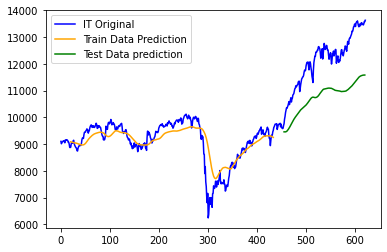

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=20
trainPredictPlot = numpy.empty_like(dfn)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dfn)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dfn)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dfn),color="blue",label="IT Original")
plt.plot(trainPredictPlot, color="orange" , label="Train Data Prediction")
plt.plot(testPredictPlot,color = "green",label="Test Data prediction")
plt.legend(loc="upper left")
plt.show()

In [ ]:
mape = np.mean(np.abs((ytest-test_predict)/ytest))*100
print('MAPE: '+str(mape))

MAPE: 1381270.8899460204


In [ ]:
len(test_data)

187

In [ ]:
x_input=test_data[166:].reshape(1,-1)
x_input.shape

(1, 21)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.968245804006497,
 0.9845966432051978,
 0.9909109366540336,
 0.989597996751489,
 0.996859772604223,
 0.9837033026529509,
 0.972137249593936,
 0.966912560909583,
 0.9763264753654577,
 0.9810638873849487,
 0.9718936112615053,
 0.9779710341093666,
 0.9876015159718463,
 0.9867420140768814,
 0.9798253925284246,
 0.9786884136437466,
 0.9760557661072009,
 0.9815173253925285,
 0.9938752030319438,
 0.9923050893340553,
 1.0]

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<10):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.98459664 0.99091094 0.989598   0.99685977 0.9837033  0.97213725
 0.96691256 0.97632648 0.98106389 0.97189361 0.97797103 0.98760152
 0.98674201 0.97982539 0.97868841 0.97605577 0.98151733 0.9938752
 0.99230509 1.        ]
0 day output [[0.72334117]]
1 day input [0.99091094 0.989598   0.99685977 0.9837033  0.97213725 0.96691256
 0.97632648 0.98106389 0.97189361 0.97797103 0.98760152 0.98674201
 0.97982539 0.97868841 0.97605577 0.98151733 0.9938752  0.99230509
 1.         0.72334117]
1 day output [[0.7223108]]
2 day input [0.989598   0.99685977 0.9837033  0.97213725 0.96691256 0.97632648
 0.98106389 0.97189361 0.97797103 0.98760152 0.98674201 0.97982539
 0.97868841 0.97605577 0.98151733 0.9938752  0.99230509 1.
 0.72334117 0.72231078]
2 day output [[0.7196164]]
3 day input [0.99685977 0.9837033  0.97213725 0.96691256 0.97632648 0.98106389
 0.97189361 0.97797103 0.98760152 0.98674201 0.97982539 0.97868841
 0.97605577 0.98151733 0.9938752  0.99230509 1.         0.72334117
 0.

In [ ]:
day_new=np.arange(1,21)
day_pred=np.arange(21,31)

In [ ]:
len(dfn)

623

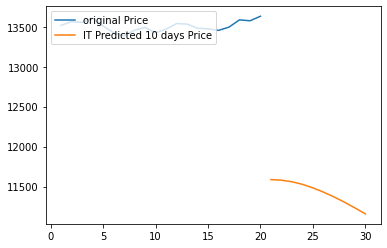

In [ ]:
plt.plot(day_new,scaler.inverse_transform(dfn[603:]),label="original Price")
plt.plot(day_pred,scaler.inverse_transform(lst_output),label="IT Predicted 10 days Price")
plt.legend(loc="upper left")
plt.show()

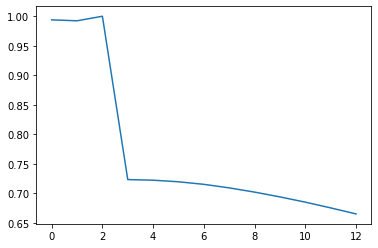

In [ ]:
df3=dfn.tolist()
df3.extend(lst_output)
plt.plot(df3[620:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

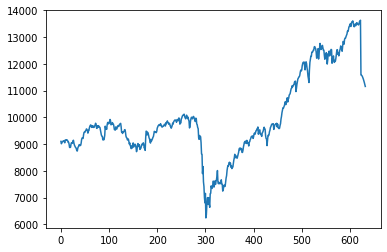

In [ ]:
plt.plot(df3)

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output3=[]
n_steps=20
i=0
while(i<30):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output3.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output3.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.97797103 0.98760152 0.98674201 0.97982539 0.97868841 0.97605577
 0.98151733 0.9938752  0.99230509 1.         0.72334117 0.72231078
 0.71961641 0.7152791  0.70928144 0.70212251 0.69401032 0.68509263
 0.67538959 0.66517836]
0 day output [[0.6548242]]
1 day input [0.98760152 0.98674201 0.97982539 0.97868841 0.97605577 0.98151733
 0.9938752  0.99230509 1.         0.72334117 0.72231078 0.71961641
 0.7152791  0.70928144 0.70212251 0.69401032 0.68509263 0.67538959
 0.66517836 0.6548242 ]
1 day output [[0.6442223]]
2 day input [0.98674201 0.97982539 0.97868841 0.97605577 0.98151733 0.9938752
 0.99230509 1.         0.72334117 0.72231078 0.71961641 0.7152791
 0.70928144 0.70212251 0.69401032 0.68509263 0.67538959 0.66517836
 0.6548242  0.64422232]
2 day output [[0.63342506]]
3 day input [0.97982539 0.97868841 0.97605577 0.98151733 0.9938752  0.99230509
 1.         0.72334117 0.72231078 0.71961641 0.7152791  0.70928144
 0.70212251 0.69401032 0.68509263 0.67538959 0.66517836 0.65482

In [ ]:
len(dfn)

623

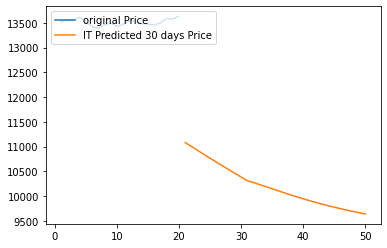

In [ ]:
day_neww=np.arange(1,21)
day_predd=np.arange(21,51)
plt.plot(day_neww,scaler.inverse_transform(dfn[603:]),label="original Price")
plt.plot(day_predd,scaler.inverse_transform(lst_output3),label="IT Predicted 30 days Price")
plt.legend(loc="upper left")
plt.show()

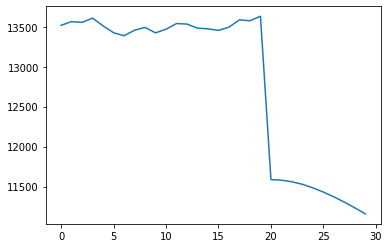

In [ ]:
df4=dfn.tolist()
df4.extend(lst_output3)
plt.plot(df3[603:])

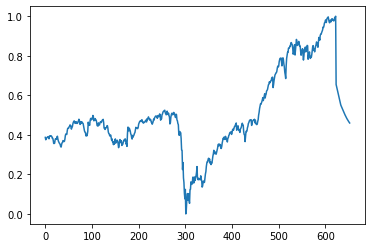

In [ ]:
plt.plot(df4)

# references: https://github.com/krishnaik06/Stock-MArket-Forecasting/blob/master/Untitled.ipynb